<a href="https://colab.research.google.com/github/larissavvsous/Mineracao-de-Dados/blob/main/Trabalho_final_Minera%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

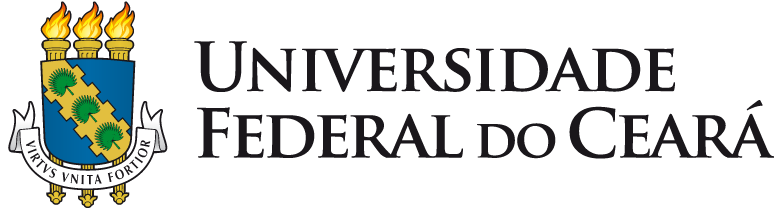

# **Mineração de Dados, Curagem, Avaliação Preditiva e Criação de MLP**

Nome do Aluno: Larissa Vitória Vasconcelos Sousa         
Código do Aluno: 519221

Nome do Aluno: Ruan Rodrigues Sousa         
Código do Aluno: 517453

Neste trabalho você deve carregar o dataset *DataSet_18_10_2023.csv* e o significado das colunas da tabelas está no arquivo atributos-dataset.pdf.

Ambos os arquivos estão no Google Drive na pasta Itapajé/TF

## Objetivos

* Executar as etapas da mineração de dados indicando cada uma delas
* Identificar as Features adequadas ao problema
* Encontrar padrões nos dados que sejam pertinentes ao problema
* Criar uma rede neural simples para desempenhar a classificação binária do Dropout
* Treinar a rede neural usando o dataset ajustado ao problema
* Avaliar o modelo e o desempenho do treinamento da rede neural

## O Problema: Predizer se um aluno irá evadir ou não uma disciplina (Droupout)

Uma universidade fez levantamento dos dados de uma disciplina que tem evasão escolar (dropout) elevado. Para isto contratou uma equipe de Cientistas dos Dados para avaliar os dados e desenvolver uma MLP que pudesse servir de modelo de predição deste evento.

# Parabéns Você foi selecionado para avaliar estes dados!

---

## Leitura da base de dados

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/data-mineracao/TF/DataSet_18_10_2023.csv')
df

,academic_year_first_registration,birth_date,nacionality,num_registrations,num_registrations_course_conferent_degree,working_student,age,total_ects,has_scholarship,moved_student,...,PL_time,frequency_grade_result,frequency_grade,normal_grade_result,normal_grade,recovery_grade_result,recovery_grade,valid_final_grade,years_since_registration,dropout
0,2007/2008,06/02/1989 06:00:00,PRT,4,10,0,32,12.0,True,False,...,22:00:00,ADNRC,0.0,F,0.0,F,0.0,0,4,True
1,2006/2007,25/04/1987 04:59:59,PRT,4,6,0,34,62.0,False,False,...,22:00:00,NANF,0.0,NaN,0.0,NaN,0.0,0,5,True
2,2007/2008,06/01/1989 06:00:00,PRT,1,6,1,32,49.0,False,False,...,20:00:00,ADNRC,0.0,D,0.0,D,0.0,0,4,True
3,2007/2008,27/07/1989 04:59:59,PRT,2,6,0,31,53.0,False,False,...,22:00:00,NANF,0.0,NaN,0.0,NaN,0.0,0,4,True
4,2006/2007,19/03/1987 06:00:00,PRT,4,4,0,34,56.0,False,False,...,22:00:00,NANF,0.0,NaN,0.0,NaN,0.0,0,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,2018/2019,05/03/2000 06:00:00,PRT,1,3,0,21,60.0,False,True,...,22:30:00,ADNA,0.0,AP,13.0,F,0.0,1,1,False
1585,2018/2019,19/04/1999 05:00:00,PRT,1,3,0,22,81.0,False,True,...,19:00:00,ADNA,0.0,F,0.0,F,0.0,0,1,True
1586,2019/2020,26/10/1999 05:00:00,ITA,3,2,0,21,50.0,False,True,...,21:00:00,ADNA,0.0,F,0.0,F,0.0,0,0,True
1587,2019/2020,11/05/1993 04:59:59,ITA,1,0,0,28,33.0,False,False,...,19:00:00,ADNA,0.0,AP,10.0,F,0.0,1,0,False


## Visualizando colunas

In [28]:
df.columns

Index(['academic_year_first_registration', 'birth_date', 'nacionality',
       'num_registrations', 'num_registrations_course_conferent_degree',
       'working_student', 'age', 'total_ects', 'has_scholarship',
       'moved_student', 'registrations', 'repetitions', 'attendance_T',
       'attendance_TP', 'attendance_PL', 'TP_time', 'PL_time',
       'frequency_grade_result', 'frequency_grade', 'normal_grade_result',
       'normal_grade', 'recovery_grade_result', 'recovery_grade',
       'valid_final_grade', 'years_since_registration', 'dropout'],
      dtype='object')

## Excluindo valores ausentes

In [29]:
df.isna().sum()

academic_year_first_registration              0
birth_date                                    0
nacionality                                   0
num_registrations                             0
num_registrations_course_conferent_degree     0
working_student                               0
age                                           0
total_ects                                    0
has_scholarship                               0
moved_student                                 0
registrations                                 0
repetitions                                   0
attendance_T                                  0
attendance_TP                                 0
attendance_PL                                 0
TP_time                                       0
PL_time                                       0
frequency_grade_result                        0
frequency_grade                               0
normal_grade_result                          35
normal_grade                            

In [30]:
df = df.dropna()
df

,academic_year_first_registration,birth_date,nacionality,num_registrations,num_registrations_course_conferent_degree,working_student,age,total_ects,has_scholarship,moved_student,...,PL_time,frequency_grade_result,frequency_grade,normal_grade_result,normal_grade,recovery_grade_result,recovery_grade,valid_final_grade,years_since_registration,dropout
0,2007/2008,06/02/1989 06:00:00,PRT,4,10,0,32,12.0,True,False,...,22:00:00,ADNRC,0.0,F,0.0,F,0.0,0,4,True
2,2007/2008,06/01/1989 06:00:00,PRT,1,6,1,32,49.0,False,False,...,20:00:00,ADNRC,0.0,D,0.0,D,0.0,0,4,True
6,2005/2006,12/06/1986 04:59:59,PRT,7,13,0,35,66.0,False,True,...,22:00:00,ADNRC,0.0,AP,11.0,F,0.0,1,6,False
7,2005/2006,11/07/1987 04:59:59,PRT,4,4,0,34,71.0,False,False,...,22:00:00,ADNRC,0.0,F,0.0,F,0.0,0,6,True
8,2005/2006,25/10/1986 04:59:59,PRT,6,12,0,34,67.0,False,True,...,00:00:00,ADNRC,0.0,AP,12.0,F,0.0,1,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,2018/2019,05/03/2000 06:00:00,PRT,1,3,0,21,60.0,False,True,...,22:30:00,ADNA,0.0,AP,13.0,F,0.0,1,1,False
1585,2018/2019,19/04/1999 05:00:00,PRT,1,3,0,22,81.0,False,True,...,19:00:00,ADNA,0.0,F,0.0,F,0.0,0,1,True
1586,2019/2020,26/10/1999 05:00:00,ITA,3,2,0,21,50.0,False,True,...,21:00:00,ADNA,0.0,F,0.0,F,0.0,0,0,True
1587,2019/2020,11/05/1993 04:59:59,ITA,1,0,0,28,33.0,False,False,...,19:00:00,ADNA,0.0,AP,10.0,F,0.0,1,0,False


## Excluindo colunas irrelevantes para o estudo

In [31]:
colunas_irrelevantes = ['academic_year_first_registration', 'birth_date', 'nacionality', 'total_ects', 'TP_time', 'frequency_grade', 'moved_student', 'recovery_grade_result', 'recovery_grade']
df = df.drop(columns=colunas_irrelevantes, errors='ignore')
df

,num_registrations,num_registrations_course_conferent_degree,working_student,age,has_scholarship,registrations,repetitions,attendance_T,attendance_TP,attendance_PL,PL_time,frequency_grade_result,normal_grade_result,normal_grade,valid_final_grade,years_since_registration,dropout
0,4,10,0,32,True,3,0,0.000000,0.636364,0.0,22:00:00,ADNRC,F,0.0,0,4,True
2,1,6,1,32,False,1,0,0.000000,0.272727,0.0,20:00:00,ADNRC,D,0.0,0,4,True
6,7,13,0,35,False,5,0,0.000000,0.181818,0.0,22:00:00,ADNRC,AP,11.0,1,6,False
7,4,4,0,34,False,4,0,0.000000,0.000000,0.0,22:00:00,ADNRC,F,0.0,0,6,True
8,6,12,0,34,False,5,0,0.000000,0.090909,0.0,00:00:00,ADNRC,AP,12.0,1,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,1,3,0,21,False,1,0,0.269231,0.307692,0.0,22:30:00,ADNA,AP,13.0,1,1,False
1585,1,3,0,22,False,1,0,0.000000,0.000000,0.0,19:00:00,ADNA,F,0.0,0,1,True
1586,3,2,0,21,False,1,0,0.269231,0.307692,0.0,21:00:00,ADNA,F,0.0,0,0,True
1587,1,0,0,28,False,1,0,0.192308,0.307692,0.0,19:00:00,ADNA,AP,10.0,1,0,False


### Juntando as três colunas de frequência dos alunos em uma só

In [32]:
df['attendance'] = df['attendance_T'] + df['attendance_TP'] + df['attendance_PL']
df

,num_registrations,num_registrations_course_conferent_degree,working_student,age,has_scholarship,registrations,repetitions,attendance_T,attendance_TP,attendance_PL,PL_time,frequency_grade_result,normal_grade_result,normal_grade,valid_final_grade,years_since_registration,dropout,attendance
0,4,10,0,32,True,3,0,0.000000,0.636364,0.0,22:00:00,ADNRC,F,0.0,0,4,True,0.636364
2,1,6,1,32,False,1,0,0.000000,0.272727,0.0,20:00:00,ADNRC,D,0.0,0,4,True,0.272727
6,7,13,0,35,False,5,0,0.000000,0.181818,0.0,22:00:00,ADNRC,AP,11.0,1,6,False,0.181818
7,4,4,0,34,False,4,0,0.000000,0.000000,0.0,22:00:00,ADNRC,F,0.0,0,6,True,0.000000
8,6,12,0,34,False,5,0,0.000000,0.090909,0.0,00:00:00,ADNRC,AP,12.0,1,6,False,0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,1,3,0,21,False,1,0,0.269231,0.307692,0.0,22:30:00,ADNA,AP,13.0,1,1,False,0.576923
1585,1,3,0,22,False,1,0,0.000000,0.000000,0.0,19:00:00,ADNA,F,0.0,0,1,True,0.000000
1586,3,2,0,21,False,1,0,0.269231,0.307692,0.0,21:00:00,ADNA,F,0.0,0,0,True,0.576923
1587,1,0,0,28,False,1,0,0.192308,0.307692,0.0,19:00:00,ADNA,AP,10.0,1,0,False,0.500000


In [33]:
colunas_attendance = ['attendance_T', 'attendance_TP', 'attendance_PL']
df = df.drop(columns=colunas_attendance, errors='ignore')
df

,num_registrations,num_registrations_course_conferent_degree,working_student,age,has_scholarship,registrations,repetitions,PL_time,frequency_grade_result,normal_grade_result,normal_grade,valid_final_grade,years_since_registration,dropout,attendance
0,4,10,0,32,True,3,0,22:00:00,ADNRC,F,0.0,0,4,True,0.636364
2,1,6,1,32,False,1,0,20:00:00,ADNRC,D,0.0,0,4,True,0.272727
6,7,13,0,35,False,5,0,22:00:00,ADNRC,AP,11.0,1,6,False,0.181818
7,4,4,0,34,False,4,0,22:00:00,ADNRC,F,0.0,0,6,True,0.000000
8,6,12,0,34,False,5,0,00:00:00,ADNRC,AP,12.0,1,6,False,0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,1,3,0,21,False,1,0,22:30:00,ADNA,AP,13.0,1,1,False,0.576923
1585,1,3,0,22,False,1,0,19:00:00,ADNA,F,0.0,0,1,True,0.000000
1586,3,2,0,21,False,1,0,21:00:00,ADNA,F,0.0,0,0,True,0.576923
1587,1,0,0,28,False,1,0,19:00:00,ADNA,AP,10.0,1,0,False,0.500000


### Transformando hora em turno

In [34]:
df['PL_time'] = pd.to_datetime(df['PL_time'], format='%H:%M:%S')

def converter_turno(hora):
    if 6 <= hora.hour < 12:
        return 'Manhã'
    elif 12 <= hora.hour < 18:
        return 'Tarde'
    else:
        return 'Noite'

df['turn'] = df['PL_time'].apply(lambda x: converter_turno(x))

df = df.drop(['PL_time'], axis = 1)

df

,num_registrations,num_registrations_course_conferent_degree,working_student,age,has_scholarship,registrations,repetitions,frequency_grade_result,normal_grade_result,normal_grade,valid_final_grade,years_since_registration,dropout,attendance,turn
0,4,10,0,32,True,3,0,ADNRC,F,0.0,0,4,True,0.636364,Noite
2,1,6,1,32,False,1,0,ADNRC,D,0.0,0,4,True,0.272727,Noite
6,7,13,0,35,False,5,0,ADNRC,AP,11.0,1,6,False,0.181818,Noite
7,4,4,0,34,False,4,0,ADNRC,F,0.0,0,6,True,0.000000,Noite
8,6,12,0,34,False,5,0,ADNRC,AP,12.0,1,6,False,0.090909,Noite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,1,3,0,21,False,1,0,ADNA,AP,13.0,1,1,False,0.576923,Noite
1585,1,3,0,22,False,1,0,ADNA,F,0.0,0,1,True,0.000000,Noite
1586,3,2,0,21,False,1,0,ADNA,F,0.0,0,0,True,0.576923,Noite
1587,1,0,0,28,False,1,0,ADNA,AP,10.0,1,0,False,0.500000,Noite


## Medidas de posição e dispersão

In [35]:
df.describe()

,num_registrations,num_registrations_course_conferent_degree,working_student,age,registrations,repetitions,normal_grade,valid_final_grade,years_since_registration,attendance
count,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000
mean,2.138996,6.590734,0.042471,26.740669,1.474260,0.725225,2.448520,0.468468,2.807593,0.948519
std,1.562185,2.433363,0.201726,3.966415,1.038682,1.080075,4.770616,0.499165,2.587238,0.766025
min,1.000000,0.000000,0.000000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.000000,0.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.272727
50%,1.000000,6.000000,0.000000,27.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.853355
75%,3.000000,8.000000,0.000000,29.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.500000
max,12.000000,23.000000,1.000000,58.000000,10.000000,7.000000,19.000000,1.000000,26.000000,3.000000


## Análise exploratória

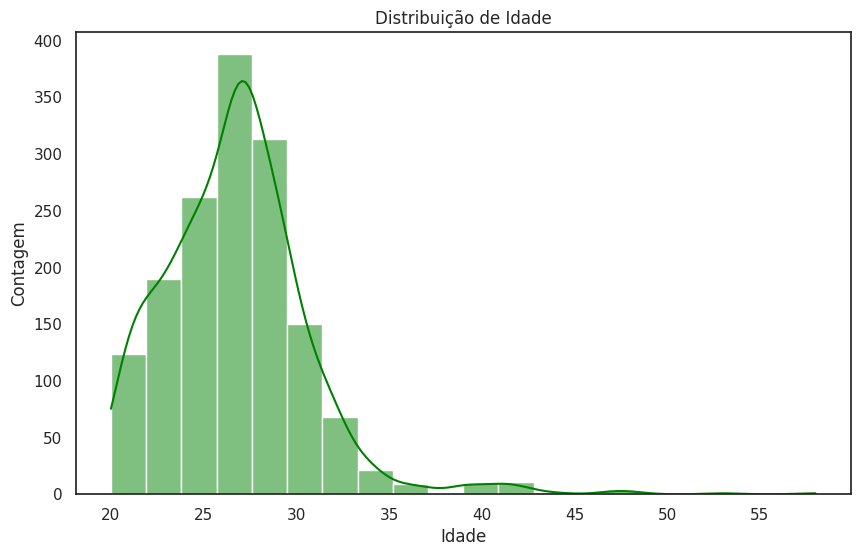

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='green')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

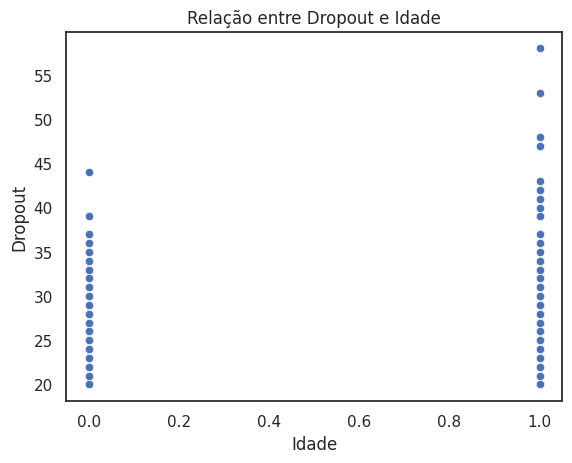

In [37]:
sns.scatterplot(x='dropout', y='age', data=df)
plt.title('Relação entre Dropout e Idade')
plt.xlabel('Idade')
plt.ylabel('Dropout')
plt.show()

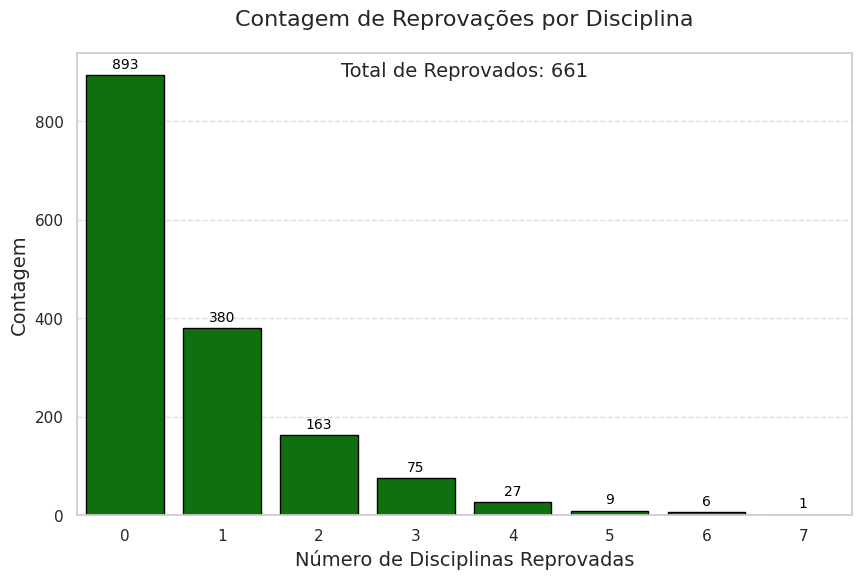

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='repetitions', data=df, color='green', edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Contagem de Reprovações por Disciplina', fontsize=16, pad=20)
plt.xlabel('Número de Disciplinas Reprovadas', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

total_reprovados = df[df['repetitions'] > 0]['repetitions'].count()
plt.text(0.5, 0.95, f'Total de Reprovados: {total_reprovados}', transform=ax.transAxes, ha='center', fontsize=14)
plt.show()

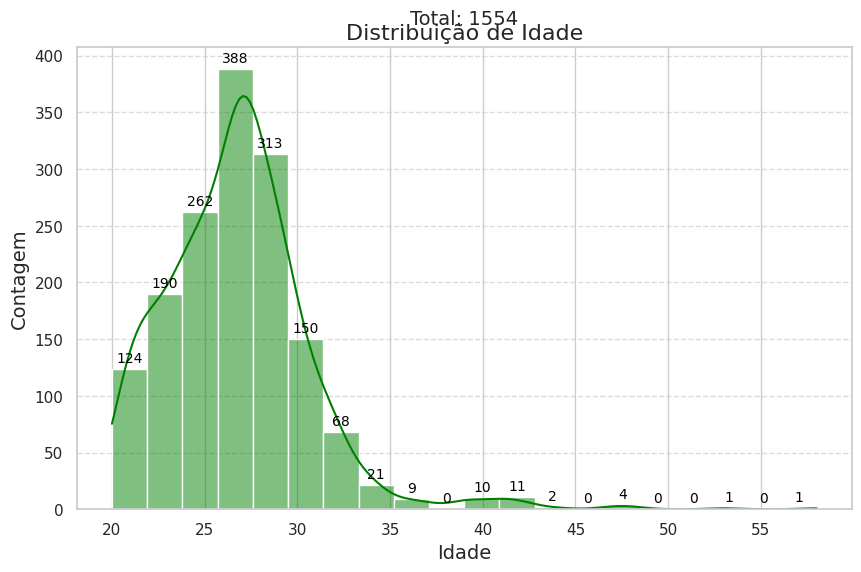

In [39]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['age'], bins=20, kde=True, color='green')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Distribuição de Idade', fontsize=16)
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

total_count = df['age'].count()
plt.text(0.5, 1.05, f'Total: {total_count}', transform=ax.transAxes, ha='center', fontsize=14)
plt.show()

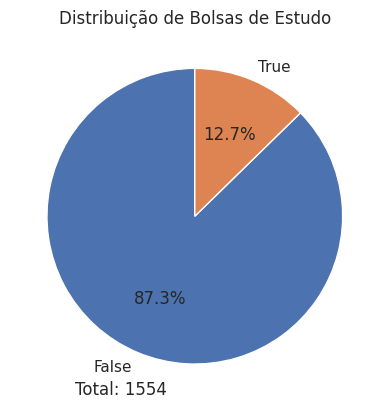

In [40]:
counts = df['has_scholarship'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Bolsas de Estudo')
plt.text(-0.5, -1.2, f'Total: {len(df)}', fontsize=12, ha='center')
plt.show()

<ipython-input-41-77281ffe83b7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacao = df.corr()


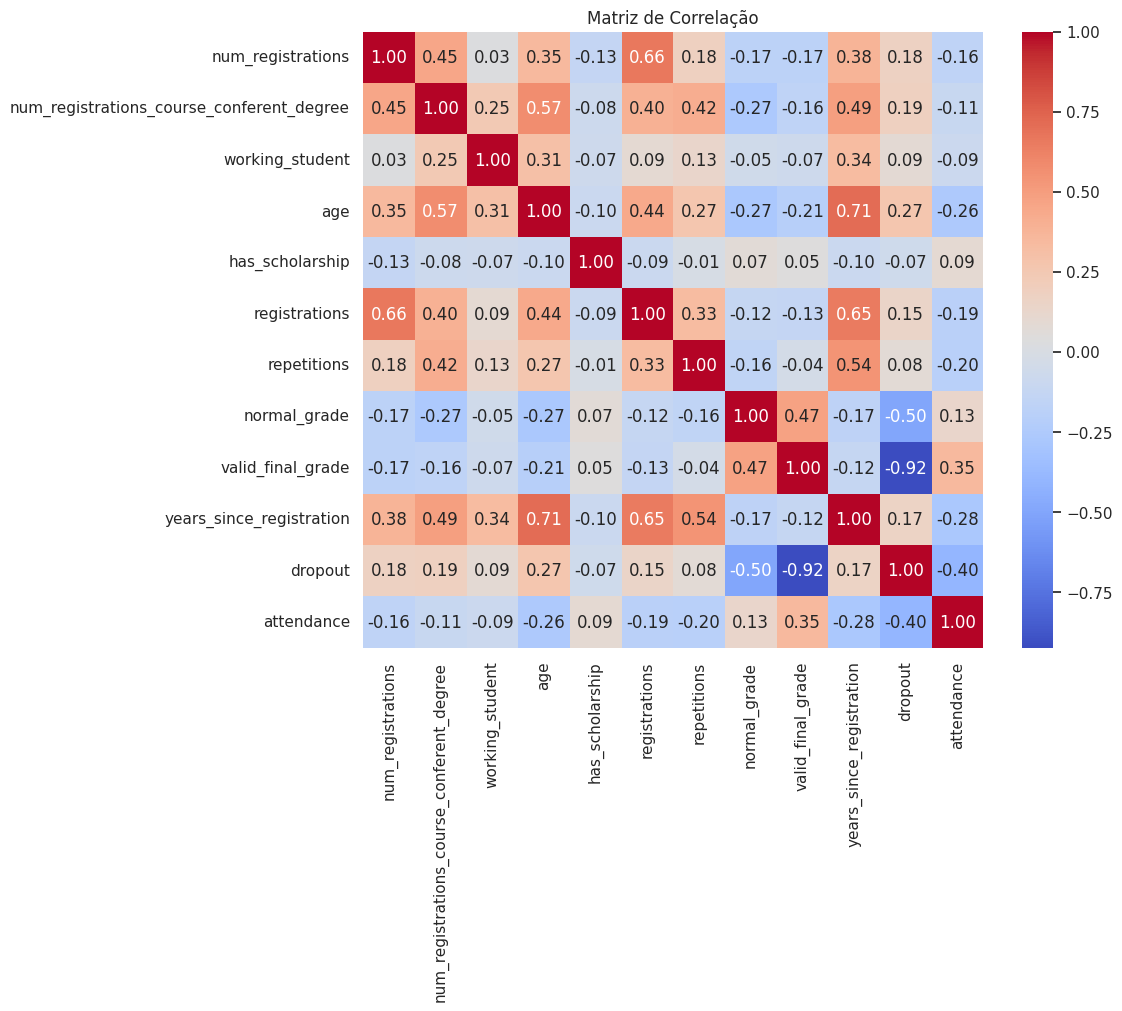

In [41]:
matriz_correlacao = df.corr()

sns.set(style="white")
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

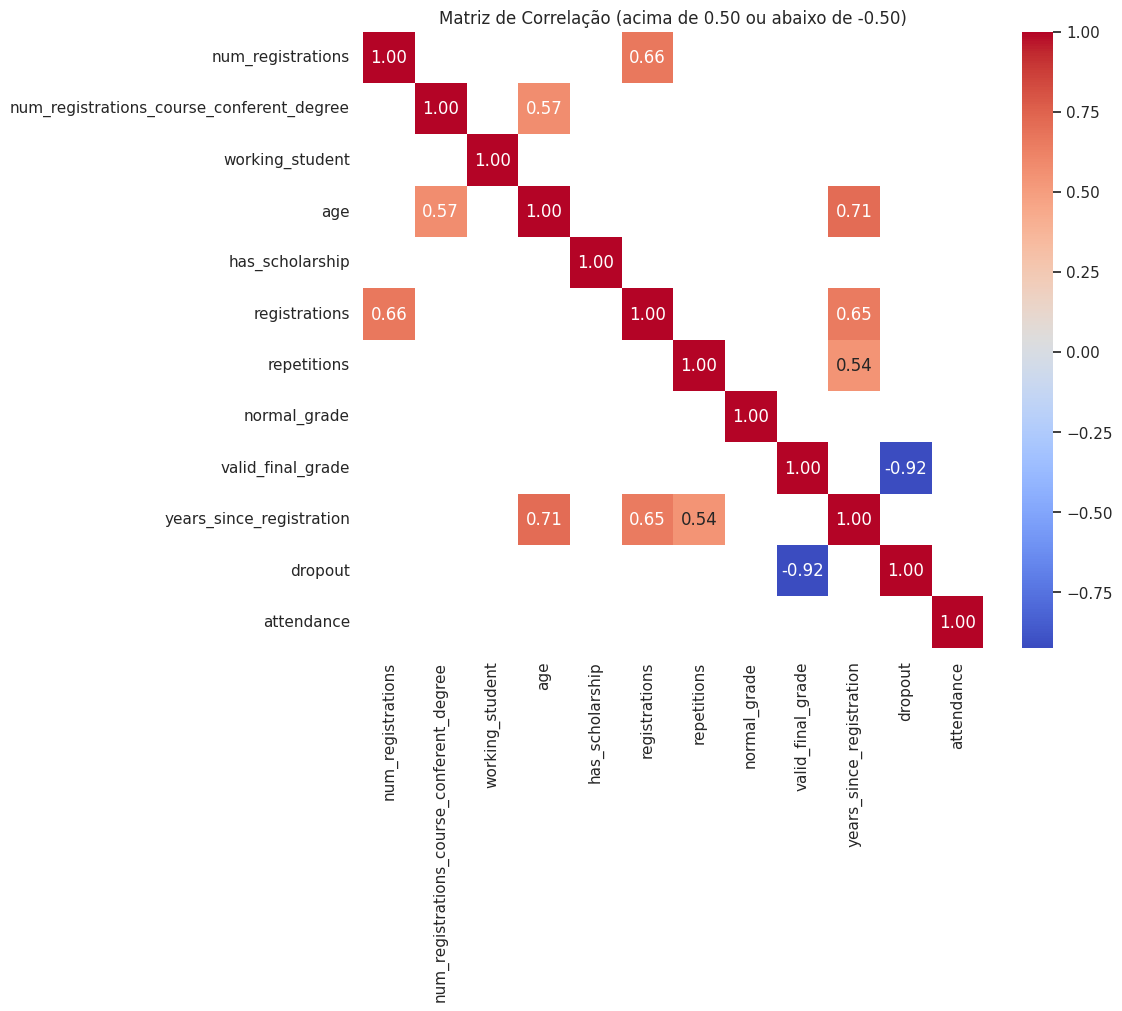

In [42]:
matriz_correlacao_filtrada = matriz_correlacao[(matriz_correlacao > 0.50) | (matriz_correlacao < -0.50)]   # filtrando correlções positivas fortes

sns.set(style="white")
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao_filtrada, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação (acima de 0.50 ou abaixo de -0.50)')
plt.show()

## Codificando colunas categóricas

In [43]:
colunas_categoricas = ['has_scholarship', 'frequency_grade_result', 'normal_grade_result', 'dropout', 'turn']

for coluna in colunas_categoricas:
    labels_unicas = df[coluna].unique()
    print(f'\nLabels únicas em "{coluna}": {labels_unicas}')


Labels únicas em "has_scholarship": [ True False]

Labels únicas em "frequency_grade_result": ['ADNRC' 'AP' 'ADNF' 'ADNA' 'R']

Labels únicas em "normal_grade_result": ['F' 'D' 'AP' 'NRC' 'R']

Labels únicas em "dropout": [ True False]

Labels únicas em "turn": ['Noite' 'Tarde']


In [44]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for coluna in colunas_categoricas:
    df[coluna] = label_encoder.fit_transform(df[coluna])

for coluna in colunas_categoricas:
    labels_unicas = df[coluna].unique()
    print(f'\nLabels únicas em "{coluna}" após a codificação: {labels_unicas}')


Labels únicas em "has_scholarship" após a codificação: [1 0]

Labels únicas em "frequency_grade_result" após a codificação: [2 3 1 0 4]

Labels únicas em "normal_grade_result" após a codificação: [2 1 0 3 4]

Labels únicas em "dropout" após a codificação: [1 0]

Labels únicas em "turn" após a codificação: [0 1]


In [45]:
df = df
df

,num_registrations,num_registrations_course_conferent_degree,working_student,age,has_scholarship,registrations,repetitions,frequency_grade_result,normal_grade_result,normal_grade,valid_final_grade,years_since_registration,dropout,attendance,turn
0,4,10,0,32,1,3,0,2,2,0.0,0,4,1,0.636364,0
2,1,6,1,32,0,1,0,2,1,0.0,0,4,1,0.272727,0
6,7,13,0,35,0,5,0,2,0,11.0,1,6,0,0.181818,0
7,4,4,0,34,0,4,0,2,2,0.0,0,6,1,0.000000,0
8,6,12,0,34,0,5,0,2,0,12.0,1,6,0,0.090909,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,1,3,0,21,0,1,0,0,0,13.0,1,1,0,0.576923,0
1585,1,3,0,22,0,1,0,0,2,0.0,0,1,1,0.000000,0
1586,3,2,0,21,0,1,0,0,2,0.0,0,0,1,0.576923,0
1587,1,0,0,28,0,1,0,0,0,10.0,1,0,0,0.500000,0


## Normalização

In [46]:
from sklearn.preprocessing import StandardScaler

coluna_alvo = df['dropout']
features = df.drop(['dropout'], axis=1)

scaler = StandardScaler()
features_normalizadas = scaler.fit_transform(features)

df_normalizado = pd.DataFrame(features_normalizadas, columns=features.columns)
df_normalizado['dropout'] = coluna_alvo

df_normalizado = df.dropna(subset=['dropout'])

df_normalizado

,num_registrations,num_registrations_course_conferent_degree,working_student,age,has_scholarship,registrations,repetitions,frequency_grade_result,normal_grade_result,normal_grade,valid_final_grade,years_since_registration,dropout,attendance,turn
0,4,10,0,32,1,3,0,2,2,0.0,0,4,1,0.636364,0
2,1,6,1,32,0,1,0,2,1,0.0,0,4,1,0.272727,0
6,7,13,0,35,0,5,0,2,0,11.0,1,6,0,0.181818,0
7,4,4,0,34,0,4,0,2,2,0.0,0,6,1,0.000000,0
8,6,12,0,34,0,5,0,2,0,12.0,1,6,0,0.090909,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,1,3,0,21,0,1,0,0,0,13.0,1,1,0,0.576923,0
1585,1,3,0,22,0,1,0,0,2,0.0,0,1,1,0.000000,0
1586,3,2,0,21,0,1,0,0,2,0.0,0,0,1,0.576923,0
1587,1,0,0,28,0,1,0,0,0,10.0,1,0,0,0.500000,0


# Código da Rede Neural

### Preparando o Ambiente

In [47]:
#O comando a seguir vai requerer autenticação no seu Google drive com a sua senha
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Random Forest


Accuracy: 98.39%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       154
           1       0.98      0.99      0.98       157

    accuracy                           0.98       311
   macro avg       0.98      0.98      0.98       311
weighted avg       0.98      0.98      0.98       311


Precision: 0.9810126582278481

Recall: 0.9872611464968153

F1-score:
0.9841269841269842


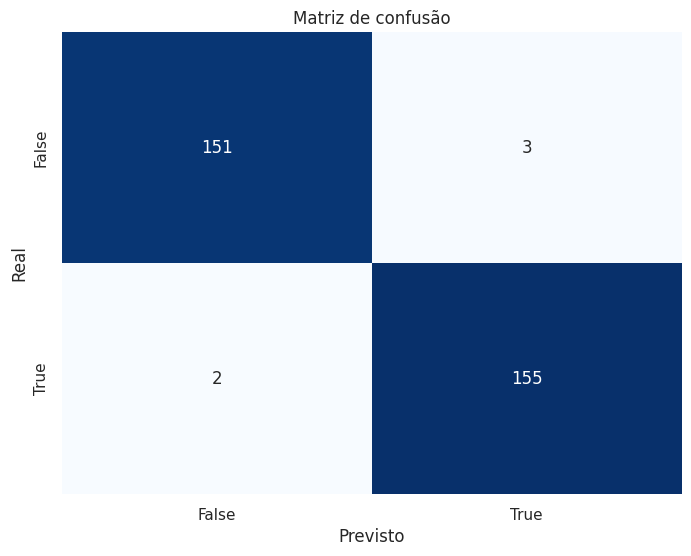

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

X = df_normalizado.drop(['dropout'], axis=1)
y = df_normalizado['dropout']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
conf_matrix_rf = confusion_matrix(y_test, y_pred)
class_report_rf = classification_report(y_test, y_pred)
precision_rf =  precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_score_rf = f1_score(y_test, y_pred)


accuracy_percent_rf = round(accuracy_rf * 100, 2)
print(f'\nAccuracy: {accuracy_percent_rf}%')
print(f'\nClassification Report:\n{class_report_rf}')
print(f'\nPrecision: {precision_rf}')
print(f'\nRecall: {recall_rf}')
print(f'\nF1-score:\n{f1_score_rf}')

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de confusão')
plt.show()

print("\n\n")

plt.figure(figsize = (20,10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names = ['0','1'], filled=True, rounded=True)
plt.show()

### MLP

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

accuracy_mlp = accuracy_score(y_test, y_pred)
conf_matrix_mlp = confusion_matrix(y_test, y_pred)
class_report_mlp = classification_report(y_test, y_pred)
precision_mlp =  precision_score(y_test, y_pred)
recall_mlp = recall_score(y_test, y_pred)
f1_score_mlp = f1_score(y_test, y_pred)

accuracy_percent_mlp = round(accuracy_mlp * 100, 2)
print(f'Accuracy: {accuracy_percent_mlp}%')
print(f'Classification Report:\n{class_report_mlp}')
print(f'\nPrecision: {precision_mlp}')
print(f'\nRecall: {recall_mlp}')
print(f'\nF1-score:\n{f1_score_mlp}')

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de confusão')
plt.show()

### Compilando o Model

Para compilar o modelo utilize o código abaixo

In [ ]:
# Importante usar a binary crossentropy e binary accuracy, pois temos um problema de classificação binária
#model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])

### 1. Observações sobre o desempenho do modelo e a Acurácia (Accuracy)

### 2. Observações sobre os padrões encontrados nos dados